In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [111]:
model = 'resnet'
# arr_rate = 30
pb = 40
time_budget = 0.1


gmd = pd.read_csv(f'/home/saisamarth/exp/{model}_bs_lr_exp_dim_infer_backtrack_multi_al.csv') 
nnRan250 = pd.read_csv(f'/home/saisamarth/exp/{model}_random_vs_nn_infer_multi_al.csv') 
bs = pd.read_csv(f'/home/saisamarth/exp/{model}_infer_only_bs_vs_optim_multi_al.csv') 
nnRan50 = pd.read_csv(f'/home/saisamarth/exp/{model}_random_vs_nn_alt_infer_multi_al.csv')   

In [112]:
gmd = gmd[(gmd['power_budget'] == pb) & (gmd['time_budget'] == time_budget)]
nnRan250 = nnRan250[(nnRan250['power_budget'] == pb) & (nnRan250['time_budget'] == time_budget)]
bs = bs[(bs['power_budget'] == pb) & (bs['time_budget'] == time_budget)]
nnRan50 = nnRan50[(nnRan50['power_budget'] == pb) & (nnRan50['time_budget'] == time_budget)]

In [113]:
gmd = gmd[(gmd['soln_algo']==1)]
nnRan250 = nnRan250[(nnRan250['soln_nn']==1)]
bs = bs[(bs['soln_optim']==1)]
nnRan50 = nnRan50[(nnRan50['soln_nn']==1)]

In [114]:
nnRan50['powermode_random'].unique()

array(['8_2201600_318750000_3199000000',
       '12_1036800_726750000_2133000000'], dtype=object)

In [115]:
# gmd = gmd[(gmd['arr_rate'] == arr_rate) & (gmd['power_budget'] == pb)]
# nnRan250 = nnRan250[(nnRan250['arr_rate'] == arr_rate) & (nnRan250['power_budget'] == pb)]
# bs = bs[(bs['arr_rate'] == arr_rate) & (bs['power_budget'] == pb)]
# nnRan50 = nnRan50[(nnRan50['arr_rate'] == arr_rate) & (nnRan50['power_budget'] == pb)]

In [116]:
# gmd = gmd[(gmd['time_budget'] == time_budget) & (gmd['arr_rate'] == arr_rate)]
# nnRan250 = nnRan250[(nnRan250['time_budget'] == time_budget) & (nnRan250['arr_rate'] == arr_rate)]
# bs = bs[(bs['time_budget'] == time_budget) & (bs['arr_rate'] == arr_rate)]
# nnRan50 = nnRan50[(nnRan50['time_budget'] == time_budget) & (nnRan50['arr_rate'] == arr_rate)]

In [117]:
new_df = pd.DataFrame({
    'observed_time_bs': bs['observed_time'],
    'observed_power_bs': bs['observed_power'],
    'bs_bs': bs['bs_bs'],
    'algo_time': gmd['algo_time'],
    'algo_power': gmd['algo_power'],
    'bs_algo': gmd['bs_algo'],
    'nn_time': nnRan250['optim_time_nn'],
    'nn_power': nnRan250['optim_power_nn'],
    'bs_nn': nnRan250['bs_nn'],
    'random_time': nnRan50['optim_time_random'],
    'random_power': nnRan50['optim_power_random'],
    'bs_random': nnRan50['bs_random'],
    'optim_time': gmd['optim_time'],
    'optim_power': gmd['optim_power'],
    'bs_optimal': gmd['bs_optimal'],
    'power_budget': gmd['power_budget'],
    'arr_rate': gmd['arr_rate'],
    'time_budget': gmd['time_budget']
})



In [118]:
new_df['observed_time_bs'] = new_df['observed_time_bs'] + (new_df['bs_bs']/new_df['arr_rate'])*1000
new_df['algo_time'] = new_df['algo_time'] + (new_df['bs_algo']/new_df['arr_rate'])*1000
new_df['nn_time'] = new_df['nn_time'] + (new_df['bs_nn']/new_df['arr_rate'])*1000
new_df['random_time'] = new_df['random_time'] + (new_df['bs_random']/new_df['arr_rate'])*1000
new_df['optim_time'] = new_df['optim_time'] + (new_df['bs_optimal']/new_df['arr_rate'])*1000

In [119]:
new_df[['observed_time_bs', 'algo_time', 'nn_time', 'random_time', 'optim_time']]

,observed_time_bs,algo_time,nn_time,random_time,optim_time
235,152.609445,49.484901,52.840182,52.315766,48.699478
686,133.561826,44.722996,48.078277,47.553861,43.937573
1137,119.276112,41.151567,44.506848,43.982432,40.366144
1588,108.165000,38.373790,41.729071,41.204655,37.588366
2039,99.276112,36.151567,39.506848,38.982432,35.366144
2490,93.265993,34.333386,96.937129,37.164251,33.547962
2941,87.205387,32.818234,90.876523,35.649099,32.032811
3392,82.077182,82.289806,85.748318,98.287262,30.750760
3843,77.681577,77.894202,81.352713,93.891657,77.491337
4294,73.872053,74.084678,77.543189,90.082134,73.681814


In [120]:
# power_fil_list = [18, 20, 22, 24, 26, 28, 30, 32]

# new_df = new_df[new_df['power_budget'].isin(power_fil_list)]
# gmd = gmd[gmd['power_budget'].isin(power_fil_list)]
# nnRan250 = nnRan250[nnRan250['power_budget'].isin(power_fil_list)]
# bs = bs[bs['power_budget'].isin(power_fil_list)]
# nnRan50 = nnRan50[nnRan50['power_budget'].isin(power_fil_list)]

In [121]:
arr_rate_list = [30, 40, 50, 60, 70, 80, 90]

new_df = new_df[new_df['arr_rate'].isin(arr_rate_list)]
gmd = gmd[gmd['arr_rate'].isin(arr_rate_list)]
nnRan250 = nnRan250[nnRan250['arr_rate'].isin(arr_rate_list)]
bs = bs[bs['arr_rate'].isin(arr_rate_list)]
nnRan50 = nnRan50[nnRan50['arr_rate'].isin(arr_rate_list)]
new_df = new_df[new_df['arr_rate'].isin(arr_rate_list)]


In [122]:
# new_df.loc[new_df['optim_time'] == 0, ['observed_time_bs', 'algo_time', 'optim_time', 'nn_time', 'random_time']] = 0
# # drop rows if any of the columns is 0
# new_df = new_df[(new_df.T != 0).all()]

In [123]:
new_df

,observed_time_bs,observed_power_bs,bs_bs,algo_time,algo_power,bs_algo,nn_time,nn_power,bs_nn,random_time,random_power,bs_random,optim_time,optim_power,bs_optimal,power_budget,arr_rate,time_budget
235,152.609445,41.4105,4.0,49.484901,24.0195,1.0,52.840182,21.265,1,52.315766,20.0795,1.0,48.699478,26.9290,1.0,40.0,30.0,0.1
1137,119.276112,41.4105,4.0,41.151567,24.0195,1.0,44.506848,21.265,1,43.982432,20.0795,1.0,40.366144,26.9290,1.0,40.0,40.0,0.1
2039,99.276112,41.4105,4.0,36.151567,24.0195,1.0,39.506848,21.265,1,38.982432,20.0795,1.0,35.366144,26.9290,1.0,40.0,50.0,0.1
2941,87.205387,38.8640,4.0,32.818234,24.0195,1.0,90.876523,32.147,4,35.649099,20.0795,1.0,32.032811,26.9290,1.0,40.0,60.0,0.1
3843,77.681577,38.8640,4.0,77.894202,38.7095,4.0,81.352713,32.147,4,93.891657,21.9210,4.0,77.491337,39.0585,4.0,40.0,70.0,0.1
4745,70.538720,38.8640,4.0,70.751345,38.7095,4.0,74.209856,32.147,4,86.748800,21.9210,4.0,70.348480,39.0585,4.0,40.0,80.0,0.1
5647,64.983165,38.8640,4.0,65.195789,38.7095,4.0,68.654300,32.147,4,81.193245,21.9210,4.0,64.792925,39.0585,4.0,40.0,90.0,0.1


In [124]:
nnRan250['num_tries'] = 250
nnRan50['num_tries'] = 50

In [125]:
new_df['arr_rate']

235     30.0
1137    40.0
2039    50.0
2941    60.0
3843    70.0
4745    80.0
5647    90.0
Name: arr_rate, dtype: float64

In [126]:
nnRan250.head()

,power_budget,powermode_random,bs_random,optim_time_random,optim_power_random,time_budget,arr_rate,soln_random,powermode_nn,bs_nn,optim_time_nn,optim_power_nn,soln_nn,flag,time_scaled,time_cond1,time_cond2,num_tries
235,40,12_2201600_726750000_3199000000,1.0,16.437232,22.6700,0.1,30,1,4_1958400_930750000_3199000000,1,19.506848,21.265,1,True,0.019507,0.052840,0.585205,250
1137,40,12_2201600_726750000_3199000000,1.0,16.437232,22.6700,0.1,40,1,4_1958400_930750000_3199000000,1,19.506848,21.265,1,True,0.019507,0.044507,0.780274,250
2039,40,12_2201600_726750000_3199000000,1.0,16.437232,22.6700,0.1,50,1,4_1958400_930750000_3199000000,1,19.506848,21.265,1,True,0.019507,0.039507,0.975342,250
2941,40,12_2201600_726750000_3199000000,1.0,16.437232,22.6700,0.1,60,1,4_1958400_930750000_3199000000,4,24.209856,32.147,1,True,0.024210,0.090877,1.452591,250
3843,40,8_1958400_930750000_3199000000,4.0,23.402991,31.5945,0.1,70,1,4_1958400_930750000_3199000000,4,24.209856,32.147,1,True,0.024210,0.081353,1.694690,250


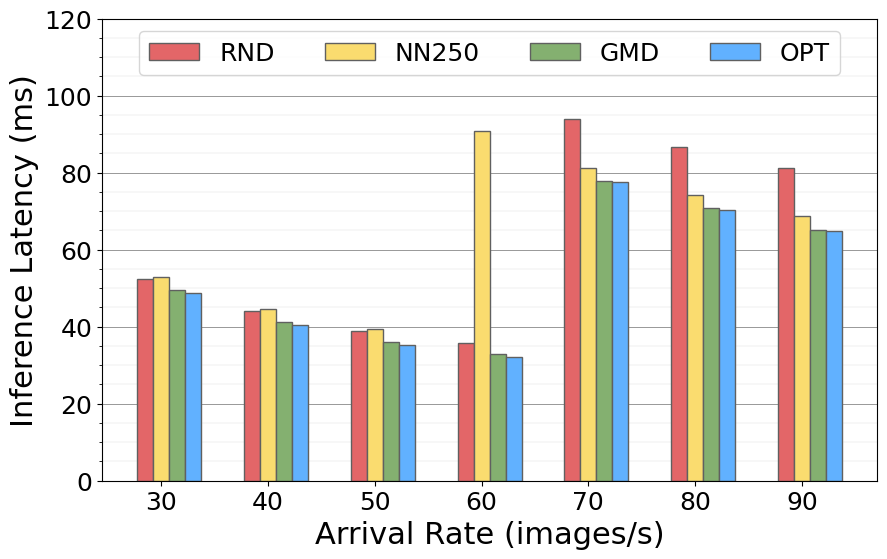

In [137]:
from turtle import pos
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Remove vertical major gridlines
ax.xaxis.grid(False)

ax.minorticks_on()

bar_width = 0.15  # Decreased the bar width for better visualization

bar_positions1 = new_df['arr_rate']/10 - 1 * bar_width
bar_positions2 = new_df['arr_rate']/10 - 0 * bar_width
bar_positions4 = new_df['arr_rate']/10 + 1 * bar_width
bar_positions5 = new_df['arr_rate']/10 + 2 * bar_width

bars1 = ax.bar(bar_positions1, new_df['random_time'], bar_width, color='#e36668', alpha=1, label='RND', edgecolor='#606060')
bars2 = ax.bar(bar_positions2, new_df['nn_time'], bar_width, color='#fadc6f', alpha=1, label='NN250', edgecolor='#606060')
bars4 = ax.bar(bar_positions4, new_df['algo_time'], bar_width, color='#84b070', alpha=1, label='GMD', edgecolor='#606060')
bars5 = ax.bar(bar_positions5, new_df['optim_time'], bar_width, color='#61b1ff', alpha=1, label='OPT', edgecolor='#606060')

ax.set_xlabel('Arrival Rate (images/s)', fontsize=22)
ax.set_ylabel('Inference Latency (ms)', fontsize=22)

ax.legend(ncols=5, fontsize=18, loc='upper center')
ax.set_axisbelow(True)
ax.set_yticks([0, 20, 40, 60, 80, 100, 120])
ax.set_yticklabels([0, 20, 40, 60, 80, 100, 120], fontsize=18)

# Set xticks to power_budget values
ax.set_xticks((new_df['arr_rate']/10).astype(int))
ax.tick_params(axis='x', which='minor', bottom=False)
ax.set_xticklabels((new_df['arr_rate']).astype(int), fontsize=18)

ax.minorticks_on()

# Add major gridlines
ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='#707070', alpha=1)

# Add horizontal minor gridlines
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')

plt.savefig('inferZoomIn.pdf', format='pdf',dpi=300, bbox_inches='tight')

plt.show()